In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_BRCpofr.csv.crdownload')
df1=df.copy()

In [3]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
df.shape

(89392, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
df.isnull().sum()/df.shape[0]

id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
cltv              0.0
dtype: float64

In [7]:
for i in df.columns:
    print(i,'==='*10)
    print(df[i].value_counts(),'\n')

id ==============================
1        1
59593    1
59601    1
59600    1
59599    1
        ..
29796    1
29795    1
29794    1
29793    1
89392    1
Name: id, Length: 89392, dtype: int64 

gender ==============================
Male      50497
Female    38895
Name: gender, dtype: int64 

area ==============================
Urban    62455
Rural    26937
Name: area, dtype: int64 

qualification ==============================
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64 

income ==============================
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64 

marital_status ==============================
1    51444
0    37948
Name: marital_status, dtype: int64 

vintage ==============================
6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64 

claim_amount ========================

In [8]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [9]:
# five point summary
# claim_amount and cltv are only numberic variable
# avg claim_amount 4351
# 6094 data lies below 75% of data.
# in our data all are claimed the data
# cltv avg is 97952

In [10]:
df.describe(include=[object])

,gender,area,qualification,income,num_policies,policy,type_of_policy
count,89392,89392,89392,89392,89392,89392,89392
unique,2,2,3,4,2,3,3
top,Male,Urban,High School,5L-10L,More than 1,A,Platinum
freq,50497,62455,46247,52716,60263,56644,47796


In [11]:
# male are more freq
# urban are more in area
# qualification more in high-school
# around 5 to 10 l are 55%
# new policies more than 1 around 80%
# type of policy platinum are around 50%

In [12]:
pd.crosstab(df['policy'],df['income'])

income,2L-5L,5L-10L,<=2L,More than 10L
policy,,,,
A,11580,35360,1399,8305
B,7487,12606,278,4264
C,2091,4750,177,1095


In [13]:
# more number of people are takeing only policy A

In [14]:
pd.crosstab(df['policy'],df['type_of_policy'])

type_of_policy,Gold,Platinum,Silver
policy,,,
A,13704,31746,11194
B,4533,12544,7558
C,2349,3506,2258


In [15]:
pd.crosstab(df['type_of_policy'],df['income'])

income,2L-5L,5L-10L,<=2L,More than 10L
type_of_policy,,,,
Gold,4462,12544,294,3286
Platinum,10908,28610,1042,7236
Silver,5788,11562,518,3142


# EDA

# univariate analysis for numberic columns:

In [16]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

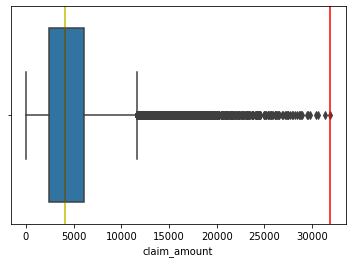

In [17]:
# Claim_amount
sns.boxplot(x=df['claim_amount'])
plt.axvline(df['claim_amount'].max(),color='r')
plt.axvline(df['claim_amount'].median(),color='y')
plt.show()  

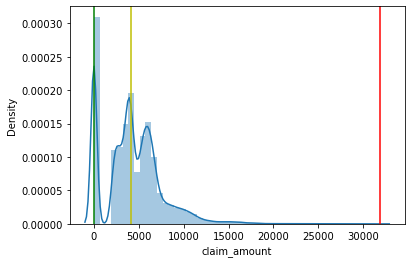

In [18]:
sns.distplot(df['claim_amount'])
plt.axvline(df['claim_amount'].max(),color='r')
plt.axvline(df['claim_amount'].median(),color='y')
plt.axvline(df['claim_amount'].min(),color='g')
plt.show()

In [19]:
# In claim_amount there are more outlier
# we can able to see its is right skew
# around 5000 are more claim_amount
# maximum claim_amount nearly 32000
# there are some not claim_amount

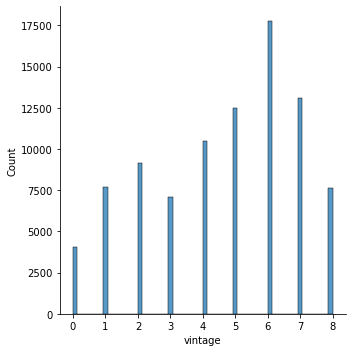

In [20]:
sns.displot(df['vintage'])
plt.show()

# univariate analysis for cat columns:

In [21]:
cat=df.select_dtypes('object')
print(cat.columns.shape)
cat.columns

(7,)


Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

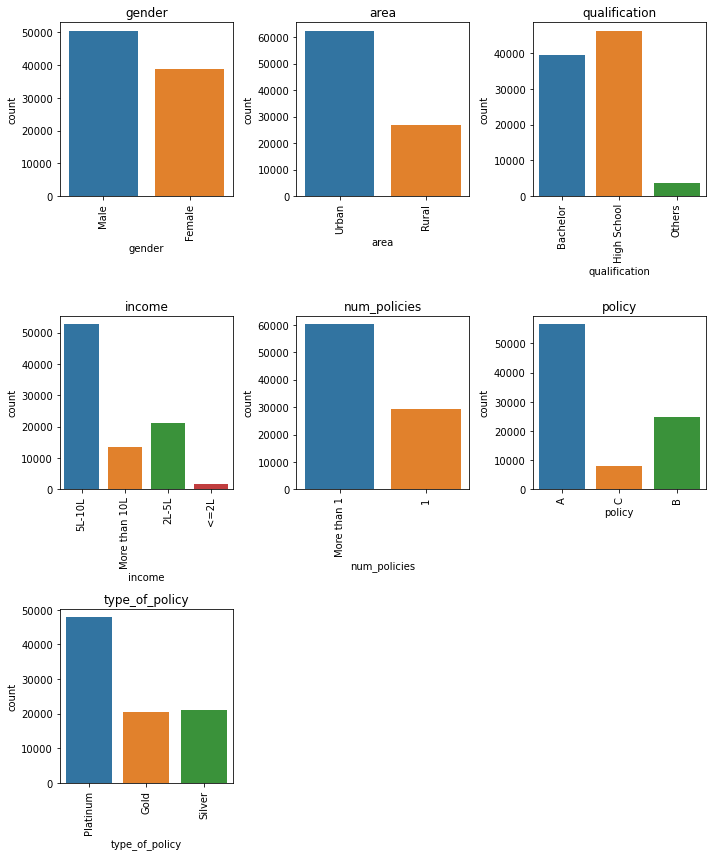

In [22]:
plt.figure(figsize=(10,12))
rows = 3
columns = 3
iterator = 1

for i in cat:
    plt.subplot(rows, columns, iterator)
    sns.countplot(df.loc[:, i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)

plt.tight_layout() # tight layout will keep the plots in perfect shape    
plt.show()

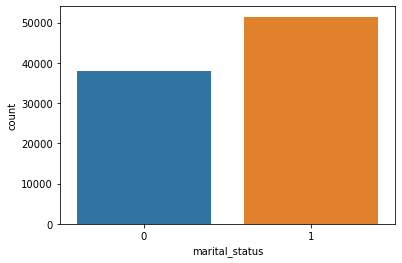

In [23]:
sns.countplot(df['marital_status'])
plt.show()

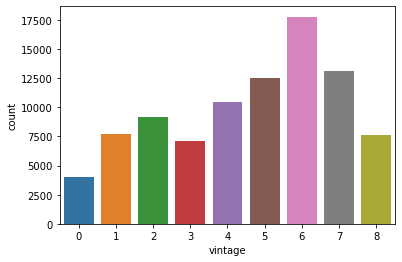

In [24]:
sns.countplot(df['vintage'])
plt.show()

# Bivariate anaysis

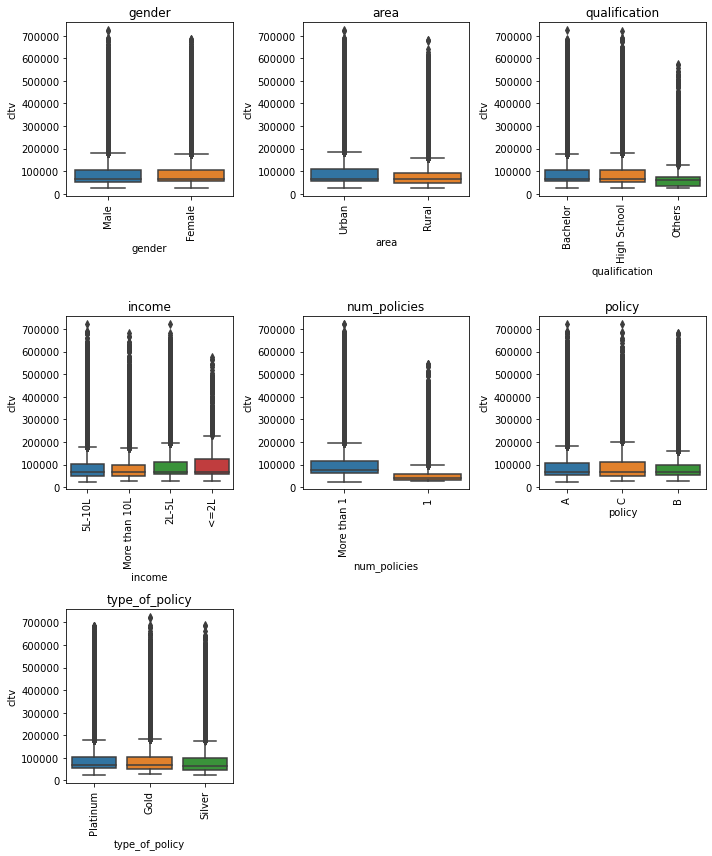

In [25]:
plt.figure(figsize=(10,12))
rows=3
col=3
iterator=1
for i in cat:
    plt.subplot(rows,col,iterator)
    sns.boxplot(x=df[i],y=df['cltv'])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

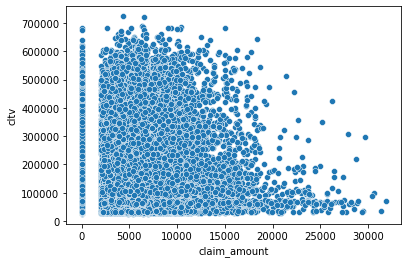

In [26]:
sns.scatterplot(data=df,x='claim_amount',y='cltv')
plt.show()

# multivariate analysis

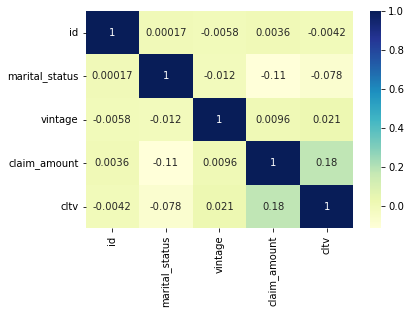

In [27]:
sns.heatmap(df.corr(),annot=True,cmap = "YlGnBu")
plt.show()

# Transformation

In [28]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [29]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=True)
df['claim_amount']=pt.fit_transform(pd.DataFrame(df['claim_amount']))

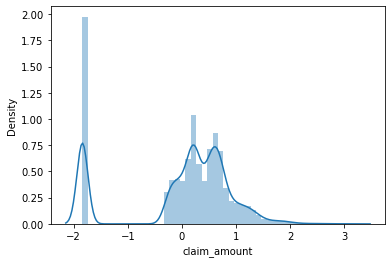

In [30]:
sns.distplot(df['claim_amount'])
plt.show()

In [31]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,0.581651,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,0.449425,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,-0.125314,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,-1.837147,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,0.112110,More than 1,A,Gold,59736


# Drop the id columns

In [32]:
df.drop(labels='id',axis=1,inplace=True)

# Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['claim_amount']=ss.fit_transform(pd.DataFrame(df['claim_amount']))
df['vintage']=ss.fit_transform(pd.DataFrame(df['vintage']))

# Encoding

In [34]:
df['gender']=df['gender'].replace({'Female' : 0,'Male': 1})

In [35]:
df['area'].replace({'Rural' : 0,'Urban': 1},inplace=True)

In [36]:
df['qualification']=df['qualification'].replace({'Others' : 0,'Bachelor': 1,'High School':2})

In [37]:
df['income'].replace({'<=2L': 0,'2L-5L' : 1,'5L-10L' :2,'More than 10L':3},inplace=True)

In [38]:
df['num_policies']=df['num_policies'].replace({'1' : 0,'More than 1': 1})

In [39]:
df['policy']=df['policy'].replace({'C' : 0,'B': 1,'A' : 2})

In [40]:
df['type_of_policy']=df['type_of_policy'].replace({'Silver' : 0,'Gold': 1,'Platinum' : 2})

In [41]:
df.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,2,1,0.176531,0.581651,1,2,2,64308
1,1,0,2,2,0,1.486327,0.449425,1,2,2,515400
2,1,1,1,2,1,1.486327,-0.125314,1,2,2,64212
3,0,0,2,2,0,1.049728,-1.837147,1,2,2,97920
4,1,1,2,3,1,0.613129,0.112110,1,2,1,59736


# parametric  model building

In [42]:
#OLS
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop(labels=['cltv','policy','vintage'],axis=1)
X=sm.add_constant(X)
y=df['cltv']
X.shape,y.shape

((89392, 9), (89392,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (62574, 9)
X_test (26818, 9)
y_train (62574,)
y_test (26818,)


In [46]:
(59595, 11)
(59892, 9)
(71513, 10)

(71513, 10)

In [47]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1337.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:47:22   Log-Likelihood:            -7.9836e+05
No. Observations:               62574   AIC:                         1.597e+06
Df Residuals:                   62565   BIC:                         1.597e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.368e+04   1734.757     30.942      0.000    5.03e+04    5.71e+04
gender          2567.5182    683.692      3.755      0.000    1227.480    3907.556
area            8328.9532    868.033      9.595      0.000    6627.607       1e+04
qualification   1109.3770    585.044      1.896      0.058     -37.311    2256.065
income         -3117.4387    516.933     -6.031      0.000   -4130.629   -2104.248
marital_status -7547.2910    686.880    -10.988      0.000   -8893.578   -6201.004
claim_amount    7760.3018    397.605     19.518      0.000    6980.995    8539.609
num_policies     6.51e+04    733.179     88.791      0.000    6.37e+04    6.65e+04
type_of_policy  1400.4349    409.984      3.416      0.001     596.866    2204.004
==============================================================================
Omnibus:                    35742.939   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278549.453
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      11.779   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [49]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [50]:
X=df.drop(labels=['cltv'],axis=1)
y=df['cltv']
X.shape,y.shape

((89392, 10), (89392,))

In [51]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_train, y_train)

0.14597159095247025

# Non-parametric model

In [52]:
df1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [53]:
df1['gender']=df1['gender'].replace({'Female' : 0,'Male': 1})
df1['area'].replace({'Rural' : 0,'Urban': 1},inplace=True)
df1['qualification']=df1['qualification'].replace({'Others' : 0,'Bachelor': 1,'High School':2})
df1['income'].replace({'<=2L': 0,'2L-5L' : 1,'5L-10L' :2,'More than 10L':3},inplace=True)
df1['num_policies']=df['num_policies'].replace({'1' : 0,'More than 1': 1})
df1['policy']=df['policy'].replace({'C' : 0,'B': 1,'A' : 2})
df1['type_of_policy']=df1['type_of_policy'].replace({'Silver' : 0,'Gold': 1,'Platinum' : 2})

In [54]:
df1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,1,2,1,5,5790,1,2,2,64308
1,2,1,0,2,2,0,8,5080,1,2,2,515400
2,3,1,1,1,2,1,8,2599,1,2,2,64212
3,4,0,0,2,2,0,7,0,1,2,2,97920
4,5,1,1,2,3,1,6,3508,1,2,1,59736


In [55]:
X=df1.drop(labels=['cltv','id'],axis=1)
y=df1['cltv']
X.shape,y.shape

((89392, 10), (89392,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (71513, 10)
X_test (17879, 10)
y_train (71513,)
y_test (17879,)


In [57]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
DT_model_y_train_predict = DT_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,DT_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,DT_model_y_train_predict)))

In [59]:
RFR_model = RandomForestRegressor(n_estimators=500,random_state=42)
RFR_model.fit(X_train,y_train)
RFR_model_y_train_predict = RFR_model.predict(X_train)
from sklearn.metrics import r2_score,mean_squared_error
print('R2 SCORE_train:',r2_score(y_train,RFR_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,RFR_model_y_train_predict)))

In [60]:
Ada_model = AdaBoostRegressor()
Ada_model.fit(X_train,y_train)
Ada_model_y_train_predict = Ada_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,Ada_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,Ada_model_y_train_predict)))

In [61]:
Gbr_model = GradientBoostingRegressor()
Gbr_model.fit(X_train,y_train)
Gbr_model_y_train_predict = Gbr_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,Gbr_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,Gbr_model_y_train_predict)))

R2 SCORE_train: 0.16626951836371884
Train RMSE: 82999.21783190597


In [62]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_model_y_train_predict = xgb_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,xgb_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,xgb_model_y_train_predict)))

R2 SCORE_train: 0.26524816702268217
Train RMSE: 77916.87012471248


In [63]:
lgm_model = LGBMRegressor()
lgm_model.fit(X_train,y_train)
lgm_model_y_train_predict = lgm_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,lgm_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,lgm_model_y_train_predict)))

R2 SCORE_train: 0.19216846672572585
Train RMSE: 81699.90670205858


# final model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [65]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_model_y_train_predict = xgb_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,xgb_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,xgb_model_y_train_predict)))

R2 SCORE_train: 0.26524816702268217
Train RMSE: 77916.87012471248


In [70]:
parameter = {'n_estimators':[100,200],'max_depth':[4,6],'min_samples_leaf':[15,20,30],'min_samples_split':[3,4]}

In [72]:
random_regressor = RandomizedSearchCV(xgb_model,parameter,n_iter=50,scoring='neg_mean_squared_error',cv=3,n_jobs=-1)
random_regressor.fit(X_train,y_train)

[22:52:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [4, 6],
                                        'min_samples_leaf': [15, 20, 30],
                                        'min_samples_split': [3, 4],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error')

In [73]:
random_regressor_ytrain_predict = random_regressor.predict(X_train)
print('R2 score:',r2_score(y_train.values,random_regressor_ytrain_predict))

Train data
R2 score: 0.1998383197719542
Train RMSE: 81311.13706934698
-----------------------


In [74]:
random_regressor.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             min_samples_leaf=15, min_samples_split=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [92]:
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', gamma=0,
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=4, min_child_weight=1,
             min_samples_leaf=15, min_samples_split=3,
             n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42)
xgb_model.fit(X_train,y_train)
xgb_model_y_train_predict = xgb_model.predict(X_train)
print('R2 SCORE_train:',r2_score(y_train,xgb_model_y_train_predict))
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,xgb_model_y_train_predict)))

[23:00:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2 SCORE_train: 0.1998383197719542
Train RMSE: 81311.13706934698


In [93]:
df_test=pd.read_csv('test_koRSKBP.csv.crdownload')
df_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [94]:
df_test.shape

(59595, 11)

In [95]:
df_test['gender']=df_test['gender'].replace({'Female' : 0,'Male': 1})
df_test['area'].replace({'Rural' : 0,'Urban': 1},inplace=True)
df_test['qualification']=df_test['qualification'].replace({'Others' : 0,'Bachelor': 1,'High School':2})
df_test['income'].replace({'<=2L': 0,'2L-5L' : 1,'5L-10L' :2,'More than 10L':3},inplace=True)
df_test['num_policies']=df_test['num_policies'].replace({'1' : 0,'More than 1': 1})
df_test['policy']=df_test['policy'].replace({'C' : 0,'B': 1,'A' : 2})
df_test['type_of_policy']=df_test['type_of_policy'].replace({'Silver' : 0,'Gold': 1,'Platinum' : 2})

In [96]:
output_dataset=pd.DataFrame()
output_dataset['id'] = df_test['id']

In [97]:
df_test=df_test.drop(labels='id',axis=1)

In [98]:
df_test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0,0,2,2,0,6,2134,1,1,0
1,0,1,2,1,0,4,4102,1,2,2
2,1,0,2,2,1,7,2925,1,1,1
3,0,0,1,3,1,2,0,1,1,0
4,0,1,2,1,0,5,14059,1,1,0


In [99]:
Final_predicted_output = random_regressor.predict(df_test)

In [100]:
Final_predicted_output.shape

(59595,)

In [101]:
output_dataset['cltv'] = Final_predicted_output

In [102]:
output_dataset.head()

,id,cltv
0,89393,87940.171875
1,89394,127576.195312
2,89395,95908.546875
3,89396,83717.085938
4,89397,105099.492188


In [103]:
output_dataset.to_csv('sample_sum1.csv',index=False)